# Danish trade balance

**Importing packages.**

In [172]:
#Importing relevant packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

**Creating dictionaries for later use.**

In [173]:
#Creating dictionaries 
columns_dict = {}
columns_dict['POST'] = 'Variable'
columns_dict['TID'] = 'Year'
columns_dict['LAND'] = 'Country'
columns_dict['INDUDBOP'] = 'Export'
columns_dict['INDHOLD'] = 'Value'

var_dict = {} 
var_dict['GOODS (FOB)'] = 'Goods'
var_dict['SERVICES'] = 'Services'
var_dict['CURRENT ACCOUNT'] = 'Current account'

country_dict = {}
country_dict['United States'] = 'USA'
country_dict['EU-28'] = 'EU'
country_dict['Norway'] = 'Norway'
country_dict['China'] = 'China'

**Retrieving data.**

In [174]:
#Retrieving the data through the API of DST and taking a quick look at it.
bb3 = dst.get_data(table_id = 'BB3', variables={'POST':['*'], 'LAND':['*'], 'TID':['*']})
bb3.head(5)

,POST,LAND,TID,INDUDBOP,INDHOLD
0,GOODS (FOB),European Union Institutions (excl. ECB and ESM),2009,Current receipts,0
1,GOODS (FOB),European Central Bank (ECB),2009,Current receipts,0
2,GOODS (FOB),European Stability Mechanism (ESM),2009,Current receipts,0
3,GOODS (FOB),INTERNATIONAL ORGANISATIONS (EXCL. EU INST.),2009,Current receipts,1
4,GOODS (FOB),AMERICA,2009,Current receipts,51841


# Read and clean data

**In this section we will clean the data by renamning rows and columns. We will furthermore select countries and areas, which we will examine.**

In [175]:
#Renaming the column names using our predefined dictionary.
bb3.rename(columns=columns_dict,inplace=True)
bb3.head(5)

,Variable,Country,Year,Export,Value
0,GOODS (FOB),European Union Institutions (excl. ECB and ESM),2009,Current receipts,0
1,GOODS (FOB),European Central Bank (ECB),2009,Current receipts,0
2,GOODS (FOB),European Stability Mechanism (ESM),2009,Current receipts,0
3,GOODS (FOB),INTERNATIONAL ORGANISATIONS (EXCL. EU INST.),2009,Current receipts,1
4,GOODS (FOB),AMERICA,2009,Current receipts,51841


In [176]:
#Renaming the variables and keeping the ones of interest (Goods, Services and Current Account)
for key,value in var_dict.items():
   bb3.Variable.replace(key,value,inplace=True)

I = False
for key,value in var_dict.items():
    I = I | (bb3.Variable == value)
bb3 = bb3[I]

In [177]:
#Selecting countries and areas for further analysis using country_dict.
for key,value in country_dict.items():
   bb3.Country.replace(key,value,inplace=True)

I = False
for key,value in country_dict.items():
    I = I | (bb3.Country == value)
bb3 = bb3[I]

bb3.head(5)

,Variable,Country,Year,Export,Value
23,Goods,EU,2009,Current receipts,333846
54,Goods,China,2009,Current receipts,11950
1341,Goods,EU,2006,Current receipts,374576
1372,Goods,China,2006,Current receipts,7032
1536,Goods,Norway,2009,Current receipts,30737


In [178]:
#Converting the type of 'Value' to floats
bb3.Value = bb3.Value.astype('float')
bb3.dtypes

Variable     object
Country      object
Year          int64
Export       object
Value       float64
dtype: object

# Analysis

**Analysis of the cleaned dataset.**

In [179]:
#Summary statistics of the data after the clean up.
bb3.groupby('Country').agg(['mean','std']).round(2)

Year            Value           
         mean   std       mean        std
Country                                  
China    2012  4.37   24537.80   14091.72
EU       2012  4.37  423260.13  215073.55
Norway   2012  4.37   47728.42   23047.97
US       2012  4.37   75696.53   42767.39

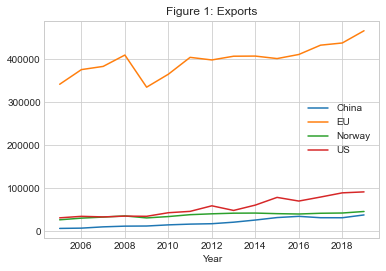

In [228]:
def plot(df):
    df_indexed = df.set_index('Year')
    df_indexed.sort_index(inplace=True)
    I = df_indexed.Variable == 'Goods'
    df_indexed[I].groupby(['Country'])['Value'].plot(legend=True, title='Figure 1: Exports');
    

plot(bb3)

Since EU is much higher we make a plot for EU it self. 

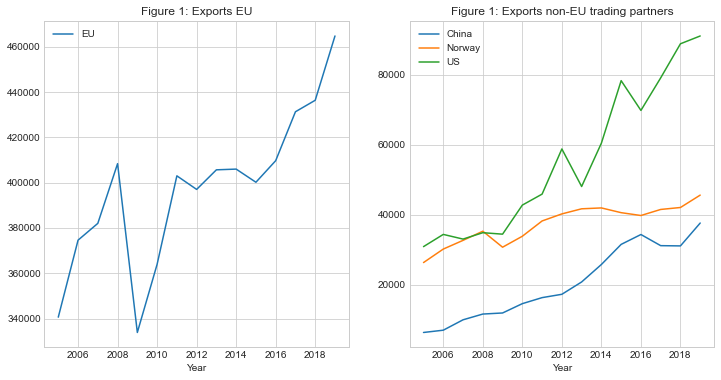

In [229]:
def plot(df):
    df_indexed = df.set_index('Year')
    df_indexed.sort_index(inplace=True)
    I = df_indexed.Variable == 'Goods'
    I1 = I & (df_indexed.Country=='EU')
    I2 = I & (df_indexed.Country!='EU')
   
    df_indexed.Export == 'Current receipts'
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    df_indexed[I1].groupby(['Country'])['Value'].plot(legend=True,ax=ax1,title='Figure 1: Exports EU')
    df_indexed[I2].groupby(['Country'])['Value'].plot(legend=True,ax=ax2, title='Figure 1: Exports non-EU trading partners')

plot(bb3)

Hvorfor vi valgte lande? 
Finanskrise.
Forklar hvad vi viser (export).
Hvilke varer der driver import og export. 
(Måske inddrag BNP-vækst). Mangler Y-akse.

# Conclusive remarks

We are fully aware that this project is not a sufficient answer to the assignment. We experienced some difficulties and ran out of time. This version is not the final version. We will redo and correct this project before the deadline for the exam.

In [214]:
#Creating dictionaries 
columns_dict_1 = {}
columns_dict_1['ART'] = 'Variable'
columns_dict_1['TID'] = 'Month'
columns_dict_1['LAND'] = 'Country'
columns_dict_1['INDUD'] = 'Exports'
columns_dict_1['INDHOLD'] = 'Value'

var_dict_1 = {} 
var_dict_1['Live animals, Food, Beverages And Tobacco'] = 'Live animals, Food, Beverages And Tobacco'
var_dict_1['Chemicals And Related Products'] = 'Chemicals And Related Products' 
var_dict_1['Machinery (excl. Transport Equipment)'] = 'Machinery (excl. Transport Equipment)' 

country_dict_1 = {}
country_dict_1['USA'] = 'USA'
country_dict_1['EU-27 (without the United Kingdom)'] = 'EU'
country_dict_1['Norway'] = 'Norway'
country_dict_1['China'] = 'China'

In [215]:
#Retrieving the data through the API of DST and taking a quick look at it.
uhv3 = dst.get_data(table_id = 'UHV3', variables={'ART':['*'], 'LAND':['*'], 'TID':['*'], 'INDUD':['*']})
uhv3.head(5)

,ART,LAND,TID,INDUD,INDHOLD
0,"Vessels, aircraft etc.",Netherlands,2000M05,Exports,0.8
1,"Vessels, aircraft etc.",Norway,2000M05,Exports,0.4
2,"Vessels, aircraft etc.",COUNTRIES TOTAL,2000M05,Exports,348.6
3,"Vessels, aircraft etc.",USA,2000M05,Exports,274.7
4,TOTAL,China,2000M05,Exports,253.1


In [216]:
#Renaming the column names using our predefined dictionary.
uhv3.rename(columns=columns_dict_1,inplace=True)
uhv3.head(5)

,Variable,Country,Month,Exports,Value
0,"Vessels, aircraft etc.",Netherlands,2000M05,Exports,0.8
1,"Vessels, aircraft etc.",Norway,2000M05,Exports,0.4
2,"Vessels, aircraft etc.",COUNTRIES TOTAL,2000M05,Exports,348.6
3,"Vessels, aircraft etc.",USA,2000M05,Exports,274.7
4,TOTAL,China,2000M05,Exports,253.1


In [217]:
#Renaming the variables and keeping the ones of interest (Export)
for key,value in var_dict_1.items():
   uhv3.Variable.replace(key,value,inplace=True)

I = False
for key,value in var_dict_1.items():
    I = I | (uhv3.Variable == value)
uhv3 = uhv3[I]

uhv3.head(5)

,Variable,Country,Month,Exports,Value
30,"Live animals, Food, Beverages And Tobacco",China,2000M05,Exports,21.3
31,"Live animals, Food, Beverages And Tobacco",Germany,2000M05,Exports,1211.3
32,"Live animals, Food, Beverages And Tobacco",France,2000M05,Exports,348.6
33,"Live animals, Food, Beverages And Tobacco",United Kingdom,2000M05,Exports,642.3
34,"Live animals, Food, Beverages And Tobacco",EU-27 (without the United Kingdom),2000M05,Exports,3651.8


In [220]:
#Selecting countries and areas for further analysis using country_dict1.
for key,value in country_dict_1.items():
   uhv3.Country.replace(key,value,inplace=True)

I = False
for key,value in country_dict_1.items():
    I = I | (uhv3.Country == value)
uhv3 = uhv3[I]

uhv3.head(20)

,Variable,Country,Month,Exports,Value
30,"Live animals, Food, Beverages And Tobacco",China,2000M05,Exports,21.3
38,"Live animals, Food, Beverages And Tobacco",Norway,2000M05,Exports,183.3
42,"Live animals, Food, Beverages And Tobacco",USA,2000M05,Exports,217.2
68,Chemicals And Related Products,China,2000M05,Exports,11.3
76,Chemicals And Related Products,Norway,2000M05,Exports,160.1
80,Chemicals And Related Products,USA,2000M05,Exports,167.3
94,Machinery (excl. Transport Equipment),China,2000M05,Exports,58.5
102,Machinery (excl. Transport Equipment),Norway,2000M05,Exports,274.2
106,Machinery (excl. Transport Equipment),USA,2000M05,Exports,248.0
164,"Live animals, Food, Beverages And Tobacco",China,2000M06,Imports,8.6


In [ ]:
#aggregate data from months to years
